In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
import emoji
from translate import Translator

ps = PorterStemmer()
# Get reviews dataframe
reviews = pd.read_csv('reviews.csv')
# Create new dataframe with only the columns we need
reviews = reviews[['listing_id', 'comments', 'reviewer_name']]
# Remove stop words from reviews
stop_words = set(stopwords.words('english'))

# Declare variables
parsedReviews = []
listing_ids = []
reviews_amount = []
listing_counter =[]
i = 0
step_size = 1

for review in reviews['comments'][0:243150:step_size]:
    # Skip if review is float
    if type(review) == float:
        i+=step_size
        continue
    # Skip reviews that are too short and review is string
    if len(review) < 10:
        i+=step_size
        continue
    # Detect language of review
    lang = 'en'
    if(review.isalpha()):
        lang = detect(review)
    # Translate review to english if it is not already in english
    if lang != 'en':
        translator = Translator(from_lang=lang, to_lang='en')
        # print(review)
        # Split the review into sentences
        sentences = review.split('.')
        # Translate each sentence
        for i in range(len(sentences)):
            sentences[i] = translator.translate(sentences[i])
        # Join the sentences back together
        review = '. '.join(sentences)
        # print(review)
        # print('-----------------')
    # Replace all emojis with their description
    review = emoji.demojize(review)
    # Replace all :s and _s with spaces
    review = review.replace(':', ' ')
    review = review.replace('_', ' ')
    # Tokenize the review
    review = WhitespaceTokenizer().tokenize(review)
    # Remove stop words, capitalisation and punctuation from the review
    filtered = [w for w in review if not w in stop_words]
    filtered = [w.lower() for w in filtered]
    filtered = [w for w in filtered if w.isalpha()]
    filtered = [w for w in filtered if len(w)>3]
    # Remove numbers from the review
    filtered = [w for w in filtered if not w.isdigit()]
    # Stem words in the review
    stemmed = [ps.stem(w) for w in filtered]
    # print(stemmed)
    # Make each review a string
    stemmed = ' '.join(stemmed)

    # Determine the listing id of the review
    listing_id = reviews['listing_id'][i]
    i+=step_size
    
    # If the id is not already in the list, add it
    if listing_id not in listing_ids:
        listing_ids.append(listing_id)
        parsedReviews.append(stemmed)
    # If the id is already in the list, append the review to the existing review
    else:
        index = listing_ids.index(listing_id)
        parsedReviews[index] += ' ' + stemmed

# Create tfidf matrix for first five reviews
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(parsedReviews)
# print(tfidf.get_feature_names_out())
# print(tfidf_matrix.toarray()[0])
# print(parsedReviews[0])

In [3]:
# print(tfidf.get_feature_names_out())
print(listing_ids[0:10])
# print(parsedReviews)

[44077, 302634, 1797712, 374792, 386860, 1804494, 393631, 1896821, 85156, 419987]


In [4]:
# Feature Engineering
# Read listings.csv into a dataframe
listings = pd.read_csv('listings.csv')
# Create new dataframe with only id and description columns
listings = listings[['id', 'description', 'host_since', 'longitude','latitude', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'accommodates','bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price','availability_365',  'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'minimum_nights', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

# Declare variables (after downloading nltk, run nltk.download('stopwords') in the console)
stop_words = set(stopwords.words('english'))

# Get the data for the listings that have reviews
listings = listings[listings['id'].isin(listing_ids)]

# Parse the host description
parsedDescriptions = []
for description in listings['description']:
    # Skip if description is float
    if type(description) != str:
        parsedDescriptions.append('')
        continue
    # Skip reviews that are too short and review is string
    if len(description) < 10:
        continue
    # Detect language of review
    lang = 'en'
    if(description.isalpha()):
        lang = detect(description)
    # Translate description to english if it is not already in english
    if lang != 'en':
        translator = Translator(from_lang=lang, to_lang='en')

        # Split the description into sentences
        sentences = description.split('.')
        # Translate each sentence
        for i in range(len(sentences)):
            sentences[i] = translator.translate(sentences[i])
        # Join the sentences back together
        description = '. '.join(sentences)
        # print(description)
        # print('-----------------')
    # Replace all emojis with their description
    description = emoji.demojize(description)
    # Replace all :s and _s with spaces
    description = description.replace(':', ' ')
    description = description.replace('_', ' ')
    # Tokenize the description
    description = WhitespaceTokenizer().tokenize(description)
    # Remove stop words, capitalisation and punctuation from the description
    filtered = [w for w in description if not w in stop_words]
    filtered = [w.lower() for w in filtered]
    filtered = [w for w in filtered if w.isalpha()]
    filtered = [w for w in filtered if len(w)>3]
    # Remove numbers from the description
    filtered = [w for w in filtered if not w.isdigit()]
    # Stem words in the description
    stemmed = [ps.stem(w) for w in filtered]
    # print(stemmed)
    # Make each description a string
    stemmed = ' '.join(stemmed)
    parsedDescriptions.append(stemmed)

# Parse the host about
parsedAbouts = []
for about in listings['host_about']:
    # Skip abouts which are not strings
    if type(about) != str:
        parsedAbouts.append('')
        continue
    # Skip reviews that are too short and review is string
    if len(about) < 10:
        parsedAbouts.append('')
        continue
    # Detect language of review
    lang = 'en'
    if(about.isalpha()):
        lang = detect(about)
    # Translate about to english if it is not already in english
    if lang != 'en':
        translator = Translator(from_lang=lang, to_lang='en')
        # print(about)
        # print('-----------------')
        # Split the about into sentences
        sentences = about.split('.')
        # Translate each sentence
        for i in range(len(sentences)):
            sentences[i] = translator.translate(sentences[i])
        # Join the sentences back together
        about = '. '.join(sentences)
        # print(about)
        # print('-----------------')
    # Replace all emojis with their description
    about = emoji.demojize(about)
    # Replace all :s and _s with spaces
    about = about.replace(':', ' ')
    about = about.replace('_', ' ')
    # Tokenize the about
    about = WhitespaceTokenizer().tokenize(about)
    # Remove stop words, capitalisation and punctuation from the about
    filtered = [w for w in about if not w in stop_words]
    filtered = [w.lower() for w in filtered]
    filtered = [w for w in filtered if w.isalpha()]
    filtered = [w for w in filtered if len(w)>3]
    # Remove numbers from the about
    filtered = [w for w in filtered if not w.isdigit()]
    # Stem words in the about
    stemmed = [ps.stem(w) for w in filtered]
    # print(stemmed)
    # Make each about a string
    stemmed = ' '.join(stemmed)
    parsedAbouts.append(stemmed)

# Tfidf matric for descriptions and abouts
tfidf = TfidfVectorizer()
tfidf_matrix1 = tfidf.fit_transform(parsedDescriptions)
tfidf_matrix2 = tfidf.fit_transform(parsedAbouts)



In [6]:
# Host since
# Convert host_since to number of weeks
listings['host_since'] = pd.to_datetime(listings['host_since'])
# Convert value to host_since_weeks
host_since = (np.datetime64('2022-12-12 00:00:00') - listings['host_since']).dt.days/7
# Divide each value by the average number of weeks
host_since = host_since/host_since.mean()
# Replace any Nan values with the mean
host_since = host_since.fillna(host_since.mean())
# Print the first five rows of host_since_weeks
print(host_since)

0      1.435456
1      1.435456
2      1.368552
3      1.340282
4      1.311699
         ...   
702    1.018954
703    0.828607
704    0.827664
706    0.845254
708    0.826722
Name: host_since, Length: 616, dtype: float64


In [7]:
#Host response time
# Convert host_response_time to a numerical value
response_time = listings['host_response_time'].map({'within an hour': 0.25, 'within a few hours': 0.5, 'within a day': 0.75, 'a few days or more': 1})
# Replace NaN values with the mean
response_time = response_time.fillna(response_time.mean())
print(response_time)

0      0.250000
1      0.250000
2      0.250000
3      0.250000
4      0.250000
         ...   
702    0.416667
703    0.250000
704    0.500000
706    0.416667
708    0.250000
Name: host_response_time, Length: 616, dtype: float64


In [8]:
# Host response rate
# Convert host_response_rate to a numerical value
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '')
response_rate = listings['host_response_rate'].astype(float) /100
# Convert NaN values to 0
response_rate = response_rate.fillna(response_rate.mean())
print(response_rate)


0      1.000000
1      1.000000
2      1.000000
3      0.920000
4      1.000000
         ...   
702    0.954444
703    1.000000
704    1.000000
706    0.954444
708    1.000000
Name: host_response_rate, Length: 616, dtype: float64


In [9]:
#Superhost
# Convert host_is_superhost to a numerical value
superhost = listings['host_is_superhost'].map({'t': 1, 'f': 0})
print(superhost)

0      1
1      1
2      0
3      1
4      0
      ..
702    0
703    0
704    1
706    0
708    1
Name: host_is_superhost, Length: 616, dtype: int64


In [10]:
# Convert host longitute to a numerical value
host_long = listings['longitude']
# Divide each value by the average longitude
host_long = listings['longitude']/listings['longitude'].mean()
print(host_long)
# Convert host longitute to a numerical value
host_lat = listings['latitude']
# Divide each value by the average latitude
host_lat = listings['latitude']/listings['latitude'].mean()
print(host_lat)

0      1.000815
1      1.000547
2      0.997225
3      0.990254
4      1.011324
         ...   
702    0.984410
703    0.998193
704    1.019919
706    0.997524
708    0.995803
Name: longitude, Length: 616, dtype: float64
0      0.998969
1      0.998975
2      1.000816
3      0.998810
4      0.999825
         ...   
702    1.002044
703    0.999856
704    1.000932
706    0.999774
708    0.999862
Name: latitude, Length: 616, dtype: float64


In [11]:
#Listings count
# Convert host_listings_count to a numerical value
listings_count = listings['host_listings_count'].astype(float)
# Divide each value by the average listings count
listings_count = listings['host_listings_count']/listings['host_listings_count'].mean()
print(listings_count)

0      0.784214
1      0.784214
2      1.176321
3      0.784214
4      1.960535
         ...   
702    0.392107
703    1.176321
704    4.313176
706    0.392107
708    0.392107
Name: host_listings_count, Length: 616, dtype: float64


In [12]:
#Print both
# Convert host_verifications to a numerical value which is the amount of verifications
verifications = listings['host_verifications'].str.len()
# Divide each value by the average number of verifications
verifications = verifications/verifications.mean()
print(verifications)

0      0.909076
1      0.909076
2      0.909076
3      0.909076
4      0.909076
         ...   
702    0.909076
703    0.909076
704    0.909076
706    0.909076
708    0.909076
Name: host_verifications, Length: 616, dtype: float64


In [13]:
# Profile pic
# Convert host_has_profile_pic to a numerical value
profice_picture = listings['host_has_profile_pic'].map({'t': 1, 'f': 0})
print(profice_picture)

0      1
1      1
2      1
3      1
4      1
      ..
702    1
703    1
704    1
706    1
708    1
Name: host_has_profile_pic, Length: 616, dtype: int64


In [14]:
# Identity verified
# Convert host_identity_verified to a numerical value
identity_verified = listings['host_identity_verified'].map({'t': 1, 'f': 0})
print(identity_verified)

0      1
1      1
2      1
3      1
4      1
      ..
702    1
703    1
704    1
706    1
708    1
Name: host_identity_verified, Length: 616, dtype: int64


In [15]:
# Split neighbourhood_cleansed into Dublin city as 1 and 0 if not
neighbourhood_area = listings['neighbourhood_cleansed'].map({'Dublin City': 1})
# Set NaNs to 0
neighbourhood_area = neighbourhood_area.fillna(0)
print(neighbourhood_area)

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
702    0.0
703    1.0
704    0.0
706    1.0
708    1.0
Name: neighbourhood_cleansed, Length: 616, dtype: float64


In [16]:
# Accommodates
# Convert accommodates to a numerical value
acc = listings['accommodates'].astype(float)
# Divide each value by the average number of accommodates
acc = listings['accommodates']/listings['accommodates'].mean()
print(acc)

# beds
# Convert beds to a numerical value
beds = listings['beds'].astype(float)
# Divide each value by the average number of beds
beds = listings['beds']/listings['beds'].mean()
print(beds)

# Accomodates to beds ratio
acc_bed_ratito = acc/beds
print(acc_bed_ratito)

# Bedrooms
# Convert bedrooms to a numerical value
bedrooms = listings['bedrooms'].astype(float)
# Divide each value by the average number of bedrooms
bedrooms = listings['bedrooms']/listings['bedrooms'].mean()
print(bedrooms)

0      0.623482
1      0.623482
2      0.311741
3      1.870445
4      1.558704
         ...   
702    0.935223
703    2.493927
704    0.311741
706    2.182186
708    0.623482
Name: accommodates, Length: 616, dtype: float64
0      1.008251
1      0.504125
2      0.504125
3      2.016502
4      1.512376
         ...   
702    1.008251
703    1.512376
704    0.504125
706    2.016502
708    0.504125
Name: beds, Length: 616, dtype: float64
0      0.618380
1      1.236759
2      0.618380
3      0.927569
4      1.030633
         ...   
702    0.927569
703    1.649012
704    0.618380
706    1.082164
708    1.236759
Length: 616, dtype: float64
0      0.61687
1      0.61687
2      0.61687
3      1.23374
4      0.61687
        ...   
702    1.23374
703    1.85061
704    0.61687
706    2.46748
708    0.61687
Name: bedrooms, Length: 616, dtype: float64


In [17]:
# Minimum nights
# Convert minimum_nights to a numerical value
min_nights = listings['minimum_nights'].astype(float)
# Divide each value by the average number of minimum nights
min_nights = listings['minimum_nights']/listings['minimum_nights'].mean()
print(min_nights)


0      0.418668
1      0.418668
2      0.279112
3      0.139556
4      0.418668
         ...   
702    0.697780
703    2.093339
704    0.139556
706    0.279112
708    0.279112
Name: minimum_nights, Length: 616, dtype: float64


In [18]:
# Convert availability_365 to a numerical value
availability = listings['availability_365'].astype(float)
# divide each value by the average availability
availability = availability/availability.mean()
print(availability)

0      1.771192
1      1.873376
2      4.938900
3      1.260271
4      0.527951
         ...   
702    0.000000
703    0.000000
704    0.000000
706    0.000000
708    2.929278
Name: availability_365, Length: 616, dtype: float64


In [19]:
# Number of reviews
# Convert number_of_reviews to a numerical value
reviews_amount = listings['number_of_reviews'].astype(float)
#Divide each value by the average number of reviews
reviews_amount = reviews_amount/reviews_amount.mean()
print(reviews_amount)

0      3.067102
1      2.496478
2      4.220237
3      3.875485
4      0.760831
         ...   
702    0.249648
703    1.735647
704    3.185981
706    0.225872
708    2.092286
Name: number_of_reviews, Length: 616, dtype: float64


In [20]:
# Convert amenities to a numerical value which is the amount of amenities
amenities = listings['amenities'].str.len()
# Divide each value by the average number of amenities
amenities = amenities/amenities.mean()
print(amenities)

0      2.448155
1      1.591826
2      1.192556
3      2.177597
4      1.171542
         ...   
702    0.682962
703    0.735497
704    2.264281
706    1.534037
708    0.990295
Name: amenities, Length: 616, dtype: float64


In [21]:
# Reviews per month
# Convert reviews_per_month to a numerical value
reviews_per_month = listings['reviews_per_month'].astype(float)
# Divide each value by the average number of reviews per month
reviews_per_month = reviews_per_month/reviews_per_month.mean()
print(reviews_per_month)

0      1.954080
1      1.616077
2      2.936402
3      3.887035
4      0.507005
         ...   
702    0.285190
703    1.827329
704    3.348343
706    0.253502
708    2.249833
Name: reviews_per_month, Length: 616, dtype: float64


In [22]:
# Linear Regression model to predict review_scores_rating

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a list of features
features = [reviews_amount, host_since, response_time, response_rate, superhost, host_long, host_lat, listings_count, verifications, profice_picture, identity_verified, neighbourhood_area, acc, beds, acc_bed_ratito, bedrooms, min_nights, availability, amenities, reviews_per_month, tfidf_matrix.toarray(), tfidf_matrix1.toarray(), tfidf_matrix2.toarray() ]
# Column stack the features
features = np.column_stack(features)
# Get the rating for each of the IDs
# Get the shape of the features
print(features.shape)
# If features has Nan values, replace them with 0
features = np.nan_to_num(features)

(616, 60136)


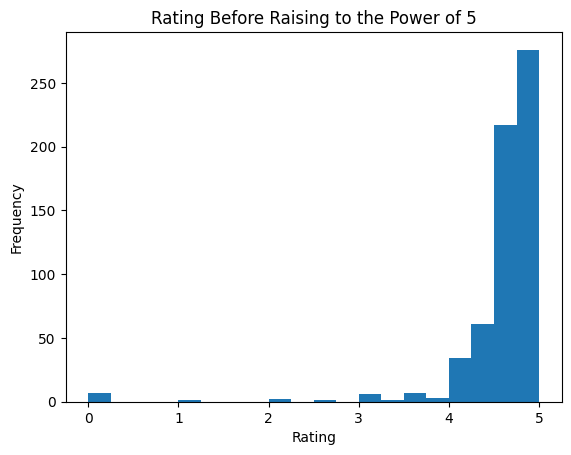

(616,)
2221.723506644286


In [23]:
# Read listings data
listings = pd.read_csv('listings.csv')
# Get the rating for each of the IDs
# Get the data for the listings that have reviews
rating_test = 'review_scores_value'
listings = listings[listings['id'].isin(listing_ids)]
rating = listings[rating_test]
#Replace Nan values with 0
rating = rating.fillna(0)
# Print a diagram of the rating to check if it is skewed
plt.hist(rating, bins=20)
# Label the axes
plt.title('Rating Before Raising to the Power of 5')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
# Get the shape of the rating
print(rating.shape)
# Cube all the values in the rating
rating = rating**5
print(rating.mean())


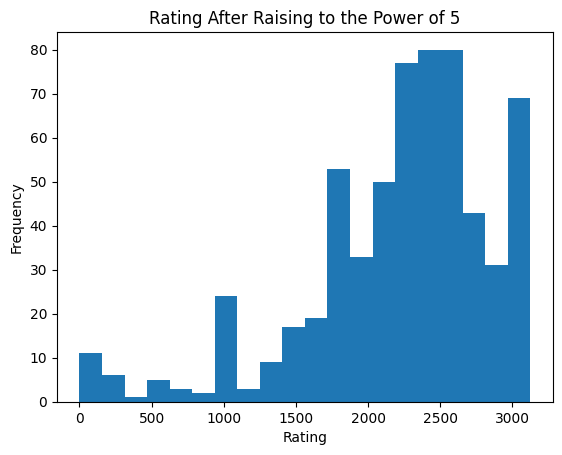

In [24]:
# Print a diagram of the rating to check if it is skewed
plt.hist(rating, bins=20)
# Label the axes
plt.xlabel('Rating')
plt.ylabel('Frequency')
#Title
plt.title('Rating After Raising to the Power of 5')
plt.show()


In [25]:
# Split the data into training and testing sets
train_features, test_features, train_rating, test_rating = train_test_split(features, rating, test_size = 0.2, random_state = 1)


In [26]:
# Create a linear regression model
model_logreg = LinearRegression()
# Fit the model to the training data
model_logreg.fit(train_features, train_rating)
# Make predictions using the testing set
predictions = model_logreg.predict(test_features)
# Cube root the predictions
predictions = predictions**(1/5)
test_rating = test_rating**(1/5)
# If prdiction is greater than 5, set it to 5
predictions[predictions > 5] = 5
# Calculate the mean squared error
mse = mean_squared_error(test_rating, predictions)
# Print the mean squared error
print(mse)
# Print the root mean squared error
print(mse**(1/2))
# Print the R^2 score
val = model_logreg.score(test_features, test_rating)
#Remember the sign of val
sign = np.sign(val)
# Absolute value of val
val = abs(val)
# Print the R^2 score
print(val**(1/5))

0.12330411008704688
0.3511468497467219
34.44009582950064


In [27]:
# Create a baseline model which predicts the mean rating
train_rating = train_rating**(1/5)
baseline = np.full((len(test_rating), 1), train_rating.mean())
# Calculate the mean squared error
mse = mean_squared_error(test_rating, baseline)
# Print the mean squared error
print(mse**(1/5))

0.650866173521714


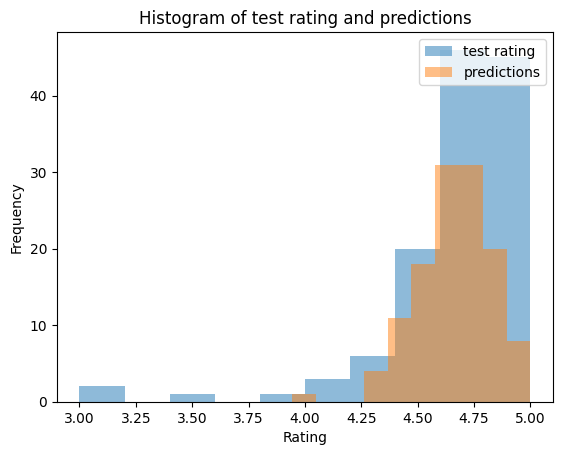

In [28]:
# Plot a histogram of the test rating and predictions
plt.hist(test_rating, alpha = 0.5, label = 'test rating')
plt.hist(predictions, alpha = 0.5, label = 'predictions')
# Label the axes
plt.xlabel('Rating')
plt.ylabel('Frequency')
# Set the title
plt.title('Histogram of test rating and predictions')
plt.legend(loc = 'upper right')
plt.show()

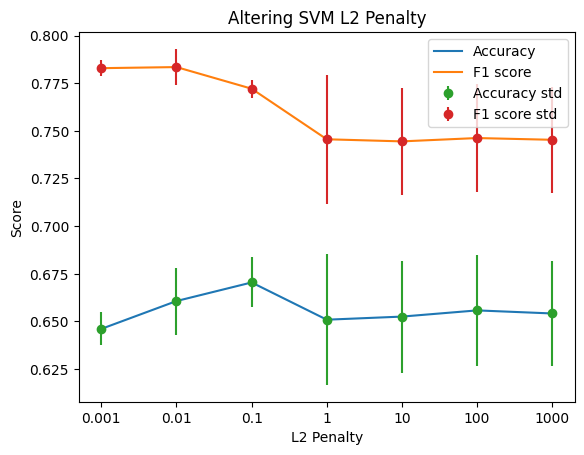

In [30]:
# Read listings data
listings = pd.read_csv('listings.csv')
# Get the rating for each of the IDs
# Get the data for the listings that have reviews
listings = listings[listings['id'].isin(listing_ids)]
rating = listings[rating_test]
# Replace NaN values with the mean
rating = rating.fillna(rating.mean())

# Get the mean of the ratings
mean_rating = np.mean(rating)

# Assign the rating to 0 if it is less than the mean rating and 1 if it is greater than the mean rating
rating = np.where(rating < mean_rating, 0, 1)

# Train a SVM model to predict the rating
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Split the data into training and testing sets
train_features, test_features, train_rating, test_rating = train_test_split(features, rating, test_size = 0.2, random_state = 1)

# Tune the value of C to get the best accuracy and f1 score using cross validation
from sklearn.metrics import f1_score

# Create a list of values for C
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

mean_score = []
mean_std = []
f1_score = []
f1_std = []

from sklearn.svm import LinearSVC
for i in C:
    svm = LinearSVC(penalty='l2', C=i, max_iter = 10000)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(svm, features, np.ravel(rating), cv=5)
    f1 = cross_val_score(svm, features, np.ravel(rating), cv=5, scoring='f1')
    mean_score.append(scores.mean())
    mean_std.append(scores.std())
    f1_score.append(f1.mean())
    f1_std.append(f1.std())


C_range_text = ["0.001", "0.01", "0.1", "1", "10", "100", "1000"]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.subplots(1,1)
ax.plot(C_range_text, mean_score, label='Accuracy')
ax.plot(C_range_text, f1_score, label='F1 score')
ax.errorbar(C_range_text, mean_score, yerr=mean_std, fmt='o', label='Accuracy std')
ax.errorbar(C_range_text, f1_score, yerr=f1_std, fmt='o', label='F1 score std')
ax.set_xlabel('L2 Penalty')
ax.set_ylabel('Score')
ax.set_title('Altering SVM L2 Penalty')
plt.legend()
plt.show()


In [31]:
# Determine the max accuracy and f1 score
max_accuracy = max(mean_score)
print(max_accuracy)

0.670456333595594


In [32]:
# Read listings data
listings = pd.read_csv('listings.csv')
# Get the rating for each of the IDs
# Get the data for the listings that have reviews
listings = listings[listings['id'].isin(listing_ids)]
rating = listings[rating_test]
# Replace NaN values with the mean
rating = rating.fillna(rating.mean())
# Assign the rating to 0 if it is less than the mean rating and 1 if it is greater than the mean rating
rating = np.where(rating < mean_rating, 0, 1)

train_features, test_features, train_rating, test_rating = train_test_split(features, rating, test_size = 0.2, random_state = 1)

# Create a SVM model with the best C value
model = LinearSVC(penalty='l2', C=0.1, max_iter = 10000)
# Fit the model to the training data
model.fit(train_features, train_rating)
# Make predictions using the testing set
predictions = model.predict(test_features)
# Calculate the accuracy
accuracy = accuracy_score(test_rating, predictions)
# Print the accuracy
print(accuracy)
# Calculate the f1 score based on the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_rating, predictions)
print(confusion_matrix)
# Calculate the f1 score
f1 = 2*confusion_matrix[0][0]/(2*confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0])
# Print the f1 score
print(f1)


0.7016129032258065
[[11 25]
 [12 76]]
0.3728813559322034


-----------------SVM coefficients with corresponding labels -----------------
-----------------SVM intercept (bias)-----------------
[0.08050716]
reviews_amount     -0.0354
host_since     -0.3108
response_time     0.0208
response_rate     0.3968
superhost     0.4255
host_long     0.0688
host_lat     0.0794
listings_count     -0.0716
verifications     0.167
profice_picture     -0.0671
identity_verified     -0.0547
neighbourhood_area     -0.1615
acc     -0.1239
beds     -0.1964
acc_bed_ratito     -0.1677
bedrooms     0.2951
min_nights     0.0101
availability     0.0109
amenities     0.0824
reviews_per_month     0.1092
-----------------SVM average coefficients for tfidf features-----------------
0.0002209811413349607
----------------- LOGREG coefficients with corresponding labels -----------------
[-1. -1.  1. ... -1.  1. -1.]
-----------------intercept (bias)-----------------
2252.801289547597
nan
reviews_amount     nan
nan
host_since     nan
1.5451873801205385
response_time     1.5452
2

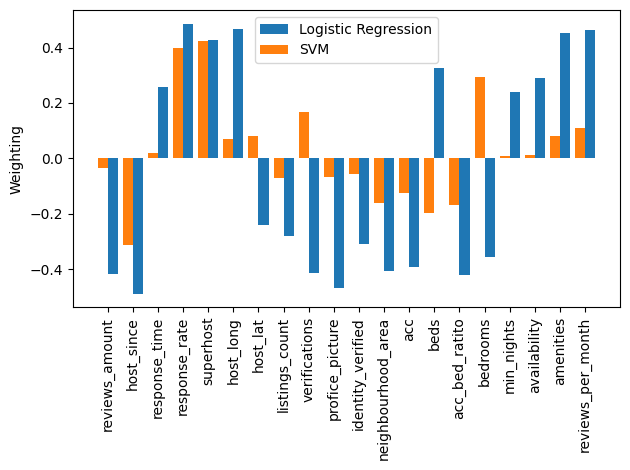

In [33]:

feature_labels = ['reviews_amount', 'host_since', 'response_time', 'response_rate', 'superhost', 'host_long', 'host_lat', 'listings_count', 'verifications', 'profice_picture', 'identity_verified', 'neighbourhood_area', 'acc', 'beds', 'acc_bed_ratito', 'bedrooms', 'min_nights', 'availability', 'amenities', 'reviews_per_month']
print('-----------------SVM coefficients with corresponding labels -----------------')
coeff_pred_svm = model.coef_
# print(coeff_pred_svm)

print('-----------------SVM intercept (bias)-----------------')
print(model.intercept_)

for i in range(len(feature_labels)):
    print(feature_labels[i], '   ', round( model.coef_[0][i], 4))

# Get the average model coefficients for the tfidf features
avg_coeff = np.mean(model.coef_[0][len(feature_labels):], axis=0)
print('-----------------SVM average coefficients for tfidf features-----------------')
print(avg_coeff)
print('----------------- LOGREG coefficients with corresponding labels -----------------')
coeff_pred_logreg = model_logreg.coef_
# Get a matrix of the signs of the coefficients
signs = np.sign(coeff_pred_logreg)
print(signs)
# Get the absolute value of the coefficients
coeff_pred_logreg = np.abs(coeff_pred_logreg)
# Take the 5th root of the coefficients
coeff_pred_logreg = coeff_pred_logreg**(1/5)
# Multiply the coefficients by the signs
coeff_pred_logreg = coeff_pred_logreg * signs
# Divide by 4
coeff_pred_logreg = coeff_pred_logreg / 6

print('-----------------intercept (bias)-----------------')
print(model_logreg.intercept_)

for i in range(len(feature_labels)):
    print(model_logreg.coef_[i]**(1/5))
    print(feature_labels[i], '   ', round( model_logreg.coef_[i]**(1/5), 4))

#-----------------View weigthing of coefficients ----------------
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.subplots(1,1)

X_axis = np.arange(len(feature_labels))

print(len(X_axis))

plt.xticks(X_axis, feature_labels, rotation=90)
ax.bar(X_axis + 0.2, coeff_pred_logreg[0:20], 0.4, label='Logistic Regression')
ax.bar(X_axis - 0.2, coeff_pred_svm[0][0:20], 0.4, label='SVM')
# Add single extra bar for the average tfidf coefficients
ax.set_ylabel('Weighting')
ax.legend()
plt.tight_layout()
plt.show()